In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/gss18.csv')
df.head()

,Unnamed: 0,ABANY,ABDEFECT,ABFELEGL,ABHELP1,ABHELP2,ABHELP3,ABHELP4,ABHLTH,ABINSPAY,...,XMARSEX,XMARSEX1,XMOVIE,XNORCSIZ,YEAR,YEARSJOB,YEARSUSA,YEARVAL,YOUSUP,ZODIAC
0,0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,6.0,2018.0,1.0,NaN,NaN,45.0,6.0
1,1,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,NaN,2.0,6.0,2018.0,NaN,NaN,NaN,NaN,11.0
2,2,NaN,NaN,NaN,1.0,2.0,1.0,1.0,NaN,2.0,...,NaN,1.0,2.0,6.0,2018.0,15.0,NaN,NaN,3.0,1.0
3,3,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,2.0,6.0,2018.0,25.0,NaN,NaN,10.0,1.0
4,4,2.0,1.0,NaN,2.0,2.0,2.0,1.0,1.0,2.0,...,1.0,NaN,2.0,6.0,2018.0,NaN,NaN,NaN,NaN,4.0


### Looking at all possible values for social isolation

In [7]:
df['LONELY2'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.])

### Making a new binary variable for being considered socially isolated based on indicating 'Sometimes', 'Often', or 'Very Often'

In [8]:
df['is_si'] = df['LONELY2'].apply(lambda x: 1.0 if x==3.0 or x==4.0 or x==5.0 else 0)

### Checking to make sure logic was executed correctly

In [10]:
df[df['LONELY2']==3][['LONELY2','is_si']]

,LONELY2,is_si
6,3.0,1.0
9,3.0,1.0
11,3.0,1.0
19,3.0,1.0
21,3.0,1.0
...,...,...
2260,3.0,1.0
2269,3.0,1.0
2275,3.0,1.0
2276,3.0,1.0


### Putting Age's into bins to match the AARP

In [12]:
df['AGE'].describe()

count    2341.000000
mean       48.971380
std        18.060879
min        18.000000
25%        34.000000
50%        48.000000
75%        63.000000
max        89.000000
Name: AGE, dtype: float64

In [13]:
bins = pd.IntervalIndex.from_tuples([(18, 29), (30, 44), (45, 59),(60,89)])


df['Age Group'] = pd.cut(df['AGE'],bins,labels=['18-29','30-44','45-59','60-85'])

### Graphing Age Groups and Social Isolation

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_11124/2095700455.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.01, '**Data: General Social Survey 2018')

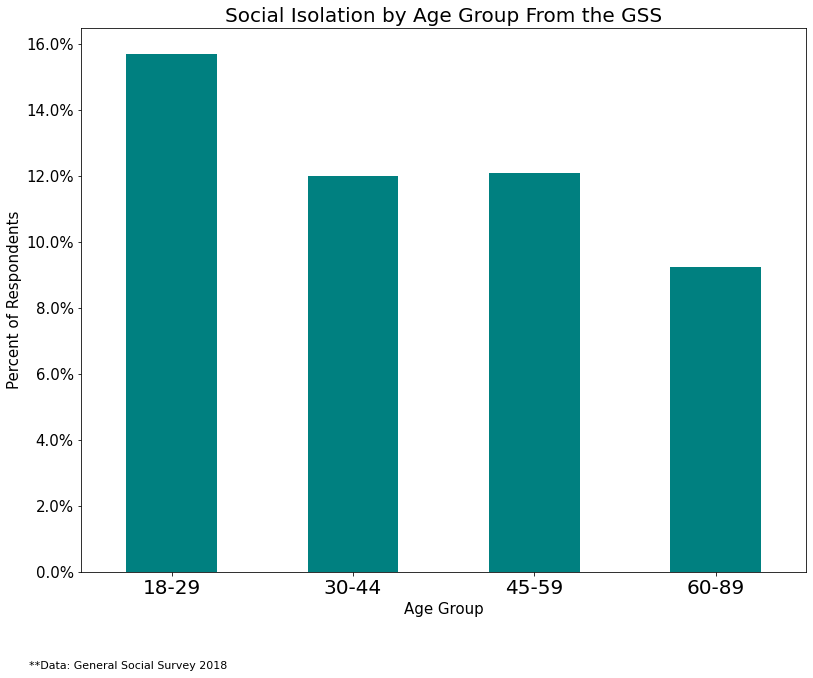

In [31]:
plt.figure(figsize=(20,100))
ax = df.groupby('Age Group')['is_si'].describe()['mean'].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by Age Group From the GSS', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_xticklabels(['18-29','30-44','45-59','60-89'])
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.01,'**Data: General Social Survey 2018',fontsize=11)

### Graphing Household Income and Social Isolation

C:\Users\Tonyj\AppData\Local\Temp/ipykernel_11124/1342940348.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])


Text(0.07, -0.05, '**Data: General Social Survey 2018')

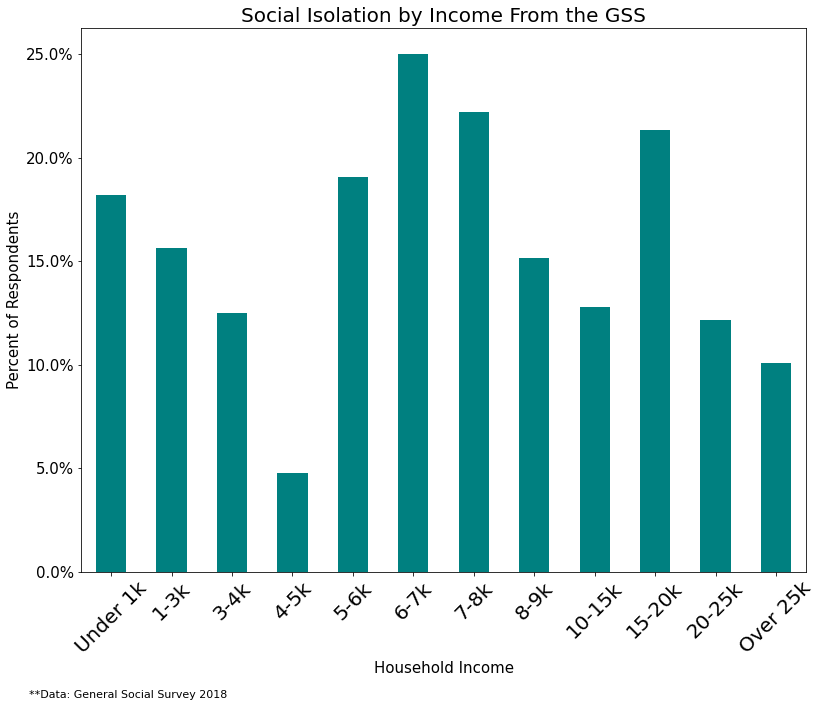

In [39]:
plt.figure(figsize=(20,100))
ax = df.groupby('RINCOME')['is_si'].describe()['mean'].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Social Isolation by Income From the GSS', fontsize=20)
plt.ylabel('Percent of Respondents',fontsize=15)
plt.xlabel('Household Income',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=45)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax.set_xticklabels(['Under 1k','1-3k','3-4k','4-5k','5-6k','6-7k','7-8k','8-9k','10-15k','15-20k','20-25k','Over 25k'])
plt.figtext(0.07, -0.05,'**Data: General Social Survey 2018',fontsize=11)
#plt.setp(ax.xaxis.get_majorticklabels(), ha="right" )

Filtering for people who responded 3: Sometimes 4: Often 5: Very often for feeling isolated from others in last 4 weeks.
282 respondents

In [4]:
isolated_df= df[(df['LONELY2']==3) | (df['LONELY2']==4) | (df['LONELY2']==5)]

<AxesSubplot:ylabel='Frequency'>

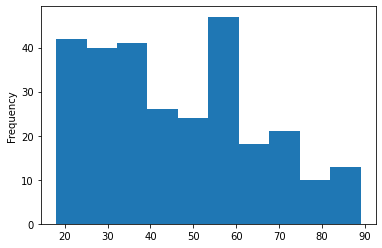

In [5]:
isolated_df['AGE'].plot(kind= 'hist', bins= 10)

<AxesSubplot:>

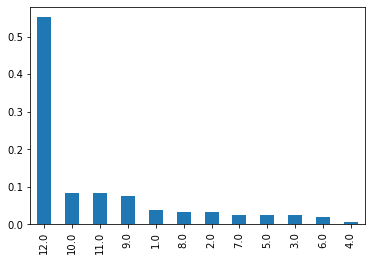

In [6]:
isolated_df['RINCOME'].value_counts(normalize= 'column').plot(kind= 'bar')

<AxesSubplot:>

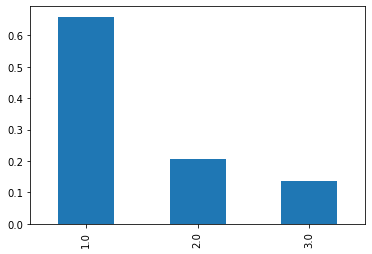

In [8]:
#white balck other
isolated_df['RACE'].value_counts(normalize= 'column').plot(kind= 'bar')

<AxesSubplot:>

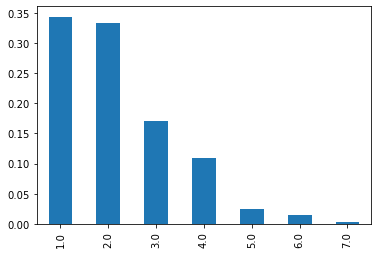

In [9]:
#num of people in household
isolated_df['HOMPOP'].value_counts(normalize= 'column').plot(kind= 'bar')